#Youtuber video analysis (SAP Data Challenge)

#01 Frame the problem

https://www.kaggle.com/datasnaek/youtube-new/download

I am using Google Colab notebook to run my code

#02 Obtain the data

#I loaded the dataset from my Local system. I am using USA Data video set.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving USvideos.csv to USvideos.csv
User uploaded file "USvideos.csv" with length 62756152 bytes


#Importing packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df1 = pd.read_csv('USvideos.csv')

#03 Anaylze the data

In [5]:
df1.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [7]:
df1['channel_title'].value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
First We Feast                            153
HellthyJunkFood                   

In [8]:
df1.shape

(40949, 16)

In [9]:
df1.columns

Index([u'video_id', u'trending_date', u'title', u'channel_title',
       u'category_id', u'publish_time', u'tags', u'views', u'likes',
       u'dislikes', u'comment_count', u'thumbnail_link', u'comments_disabled',
       u'ratings_disabled', u'video_error_or_removed', u'description'],
      dtype='object')

In [18]:
df1.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [0]:
#df1['trending_date'] = pd.to_datetime(df1['trending_date'])

In [16]:
df1['trending_date'].value_counts()

18.24.02    200
18.15.04    200
17.30.12    200
17.30.11    200
18.23.03    200
18.23.01    200
18.23.05    200
17.03.12    200
17.01.12    200
17.04.12    200
17.12.12    200
17.07.12    200
17.08.12    200
17.02.12    200
17.31.12    200
18.30.05    200
18.15.01    200
18.30.03    200
18.30.01    200
18.08.05    200
18.08.06    200
18.08.01    200
18.21.02    200
18.21.03    200
18.21.01    200
18.21.04    200
18.03.01    200
18.01.03    200
18.01.01    200
18.01.06    200
           ... 
18.05.02    199
18.06.02    199
18.03.03    199
18.18.03    199
18.19.03    199
18.12.03    199
18.08.03    199
18.23.02    199
18.14.02    199
18.15.02    199
18.15.05    199
18.13.02    199
18.13.03    199
18.22.02    199
18.20.03    199
18.07.03    199
18.15.03    199
18.29.01    199
18.07.02    199
18.26.02    199
18.27.02    198
18.14.03    198
18.16.03    198
18.12.02    198
18.17.03    198
18.01.02    197
18.31.01    197
18.03.02    196
18.04.02    196
18.02.02    196
Name: trending_date, Len

In [10]:
df1.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

#04 Feature Engineering

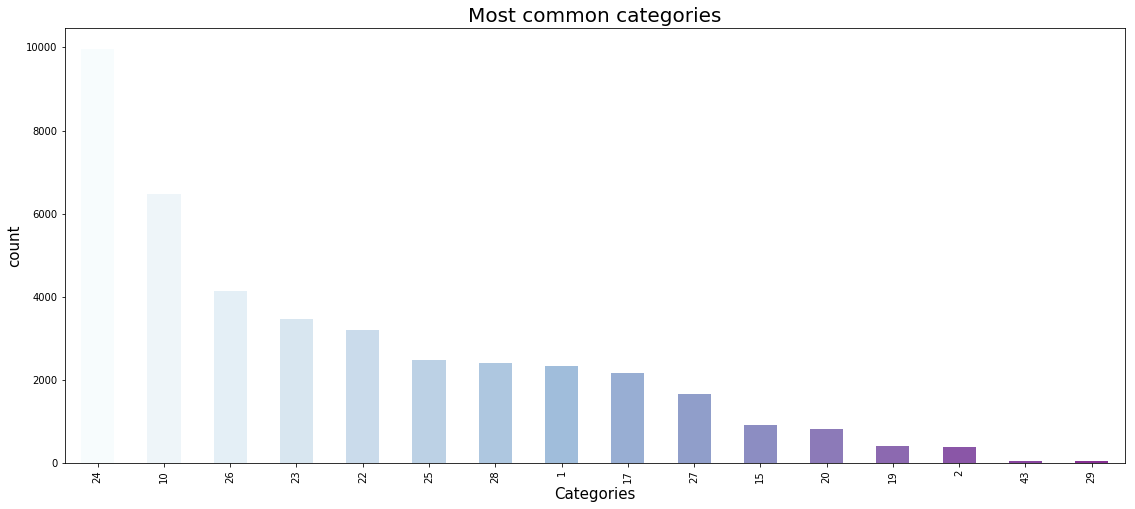

In [36]:
plt.rcParams['figure.figsize'] = (19,8)

color = plt.cm.BuPu(np.linspace(0, 1, 20))
df1['category_id'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title('Most common categories', fontsize = 20)
plt.xlabel('Categories', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

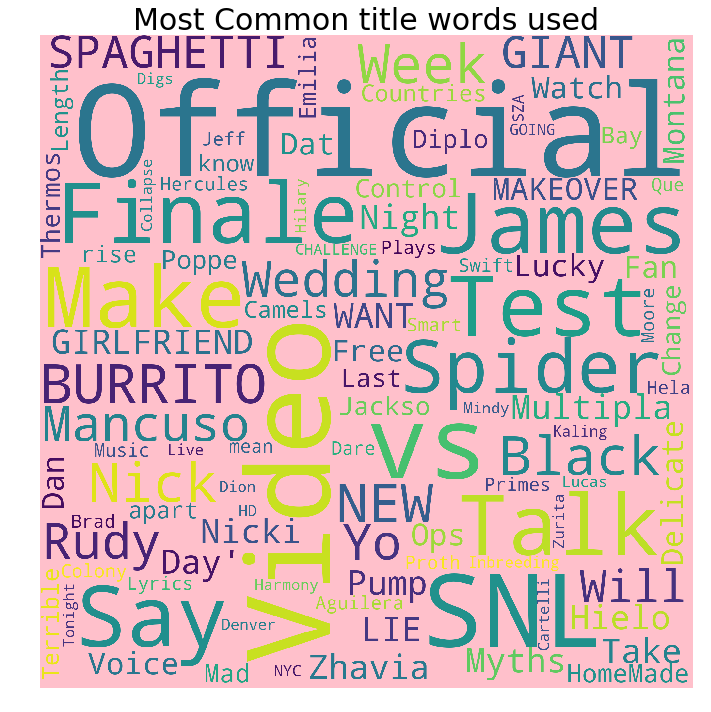

In [39]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', max_words = 100,
                      width = 2000,
                       height = 2000).generate(str(df1['title']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Common title words used', fontsize = 30)
plt.show()

In [26]:
df1['likes'].mean()


74266.7024347359

In [27]:
df1['dislikes'].mean()

3711.400888910596

In [42]:
df1['comment_count'].mean()

8446.803682629612

In [28]:
df1['views'].mean()

2360784.6382573447

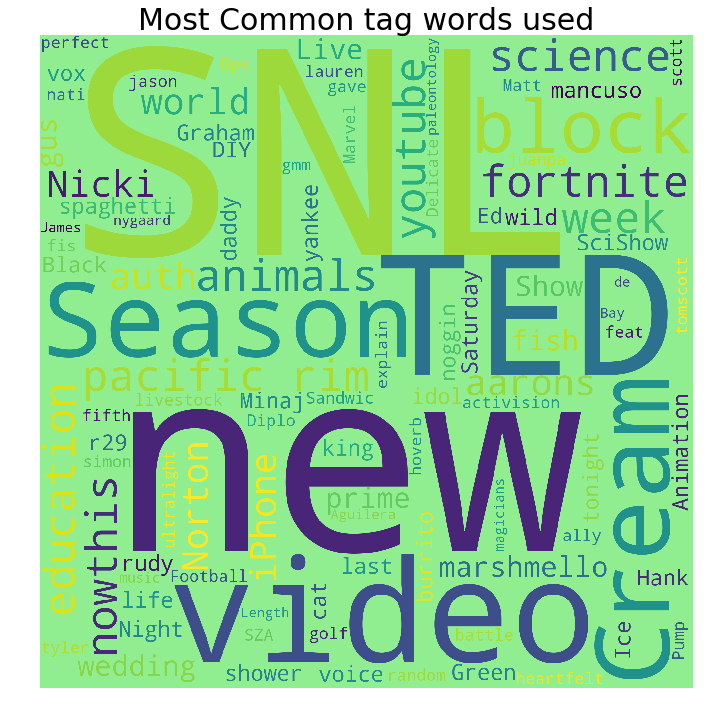

In [33]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', max_words = 100,
                      width = 2000,
                       height = 2000).generate(str(df1['tags']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Common tag words used', fontsize = 30)
plt.show()

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

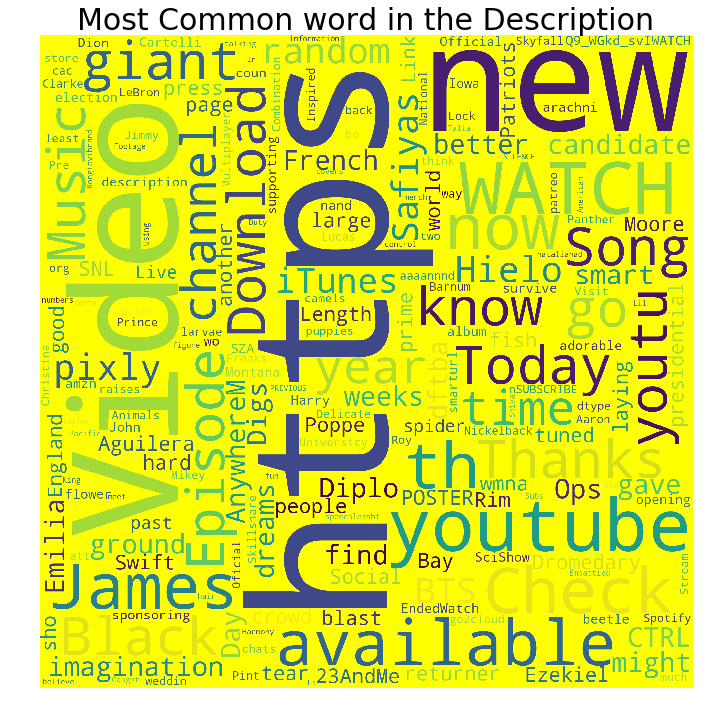

In [34]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'yellow',
                      width = 2000,
                      height = 2000).generate(str(df1['description']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Common words in the Description', fontsize = 30)
plt.show()

In [50]:
df1.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [0]:
#regular expression 
import re 

#regular expression for the removal of name tags and the emoticons from youtube tille and tags.
def process(Description):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",Description.lower()).split())

In [0]:
df1['tags'] = df1['tags'].astype('string')

In [0]:
#df1['title'] = df1['title'].astype('string')

In [0]:
df1['Newtags']= df1['tags'].apply(process)

In [0]:
#df1['newcategory'] = df1['category_id'].astype('string')

In [0]:
#df1['Newtitle']= df1['title'].apply(process)

#05 Model selection

# Support Vector Classifier Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


In [0]:
count_vect = CountVectorizer(stop_words='english',ngram_range=(1,3),analyzer='word')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [0]:
#splitting the data into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(df1["Newtags"],df1["category_id"],
                                                    test_size = 0.2, random_state = 42)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [10]:
#SVC classification modesl being used
from sklearn.svm import LinearSVC

model_svc = LinearSVC(C=2.0,max_iter=100,tol=0.0003,loss ='hinge')
model_svc.fit(x_train_counts,y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=100, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0003, verbose=0)

In [0]:
predict_svc = model_svc.predict(x_test_counts)

In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score, confusion_matrix

In [13]:
f1_score(y_test,predict_svc, average = 'micro')

0.9582417582417583

In [14]:
recall_score(y_test,predict_svc, average = 'micro')

0.9582417582417583

In [15]:
accuracy_score(y_test,predict_svc)

0.9582417582417583

#06 Tune the model

In [16]:
#optimizing parameters
from sklearn.model_selection import GridSearchCV


params = {"tfidf__ngram_range": [(1, 2), (1,3), (1,4)],
          "svc__C": [ .01,.1, 1, 10,100]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                ("svc", LinearSVC(loss='hinge'))])

gs = GridSearchCV(clf, params, verbose=4, n_jobs=-1)
gs.fit(x_train,y_train)
print("Best Estimator = ", gs.best_estimator_)
print("Best Score = ",gs.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [0]:
predicted = gs.predict(x_test)

In [0]:
predicted

In [0]:
f1_score(y_test,predicted, average = 'micro')

In [0]:
recall_score(y_test,predicted, average = 'micro')

In [0]:
precision_score(y_test,predicted, average = 'micro')

In [0]:
accuracy_score(y_test,predicted)